In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import scipy.stats as stats
from scipy.spatial.distance import euclidean as dist

In [3]:
dftrain = pd.read_csv('raw.csv')
classA =dftrain.target ==1
classB =dftrain.target ==0
total =len(dftrain)
dftrain[classB].head(5) 
dfA = dftrain[classA].iloc[:,2:]
dfB = dftrain[classB].iloc[:,2:]
dfA.shape

(160, 300)

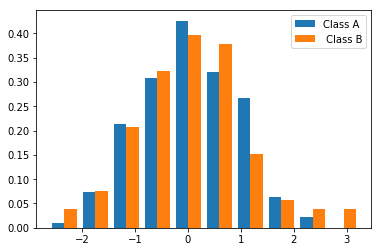

In [4]:
var = 296
plt.hist([dfA.iloc[:,var],dfB.iloc[:,var]], label = ['Class A', ' Class B'],density =True )
plt.legend(loc='upper right')
plt.show()
# looking at distributions seems Class b is generally larger

In [5]:
# looking at distributions seems Class b is generally larger
#Out line for next sections

#Create vectors to store results from Ftest and from ttest
import scipy.stats as stats
centerChoice = 'mean' # choices median or mean 
Lttest =np.zeros(len(dfA.columns))
ttResults =np.zeros(len(dfA.columns))
equalVariances = np.full(len(dfA.columns),True,dtype=bool)
keepVar = np.full(len(dfA.columns),True, dtype = bool)
alpha1 = .05
alpha2 = .01
for i in range(0,len(dfA.columns)):
    Lttest[i] = stats.levene(dfA.iloc[:,i],dfB.iloc[:,i],center=centerChoice).pvalue
    equalVariances[i] = ((1-alpha1/2)>Lttest[i])&(Lttest[i]>alpha1/2)
    ttResults[i] = stats.ttest_ind(dfA.iloc[:,i],dfB.iloc[:,i],equal_var= equalVariances[i]).pvalue
    keepVar = ((1-alpha2/2)>ttResults[i])&(ttResults>alpha2/2)

In [6]:
dfAReduced = dfA.drop(dfA.columns[keepVar], axis =1)
dfBReduced = dfB.drop(dfA.columns[keepVar], axis =1)
dfAMeans = dfAReduced.mean(axis = 0)
dfBMeans = dfBReduced.mean(axis = 0)


In [7]:
testData=pd.read_csv("test.csv")
testData=testData.iloc[:,1:]
testData =testData.drop(testData.columns[keepVar], axis=1)
testData.columns
len(testData)

19750

In [10]:
distFromCenter= np.zeros((len(testData),2))
for i in range(0,len(testData)):
    distFromCenter[i,0] = dist(np.array(dfAMeans).reshape(-1,1),testData.values[i,:].reshape(-1,1))
    distFromCenter[i,1] = dist(np.array(dfBMeans).reshape(-1,1),testData.values[i,:].reshape(-1,1))

result = pd.DataFrame(distFromCenter).idxmin(axis = 1)
result.index.name = "id"
result.name=['target']
result.index = result.index +250
result.to_csv("results4.csv")


In [104]:
result.head()

id
250    0
251    0
252    1
253    1
254    1
Name: target, dtype: int64

In [70]:
np.array(testData).size

335750

In [73]:
np.array(dfAMeans).size

17

In [82]:
type(testData.values[i,:])

numpy.ndarray

17.0